In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_excel("C:/Users/suniantara/Desktop/bootcamp/data/PopulationEstimates1.xls",skiprows=2)
df

,FIPS,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2017,R_DOMESTIC_MIG_2018,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780138,...,0.424031,1.171362,0.516888,1.234191,1.607294,0.619874,0.646064,0.817666,1.079070,1.856398
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54574,...,1.066088,0.666403,6.002073,-6.119262,-3.885124,1.971001,-1.859380,5.250727,1.029950,0.630381
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182264,...,21.996950,24.298662,16.345147,17.638173,22.876199,20.239802,17.932091,21.484903,22.534622,24.846682
4,1005,AL,Barbour County,6.0,6.0,6.0,6.0,3.0,27457,27457,...,-25.501697,-9.072923,0.256035,-6.786002,-8.093425,-5.102231,-15.531931,-18.152860,-25.030896,-8.593297
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3268,72145,PR,"Vega Baja Municipio, Puerto Rico",1.0,1.0,1.0,1.0,NaN,59662,59662,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3269,72147,PR,"Vieques Municipio, Puerto Rico",7.0,7.0,12.0,12.0,NaN,9301,9301,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3270,72149,PR,"Villalba Municipio, Puerto Rico",2.0,2.0,2.0,2.0,NaN,26073,26073,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3271,72151,PR,"Yabucoa Municipio, Puerto Rico",1.0,1.0,1.0,1.0,NaN,37941,37941,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


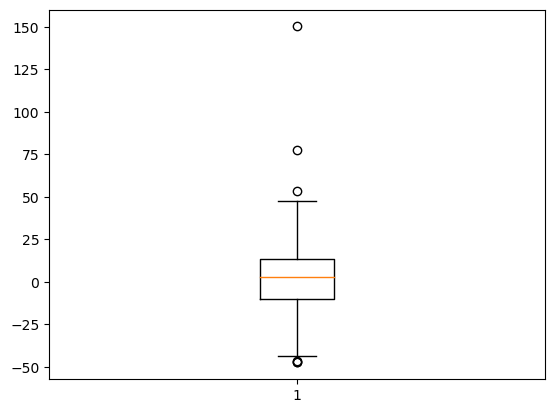

In [14]:
dfTX = df[df["State"]=="TX"]
plt.boxplot(dfTX['R_NET_MIG_2017']);

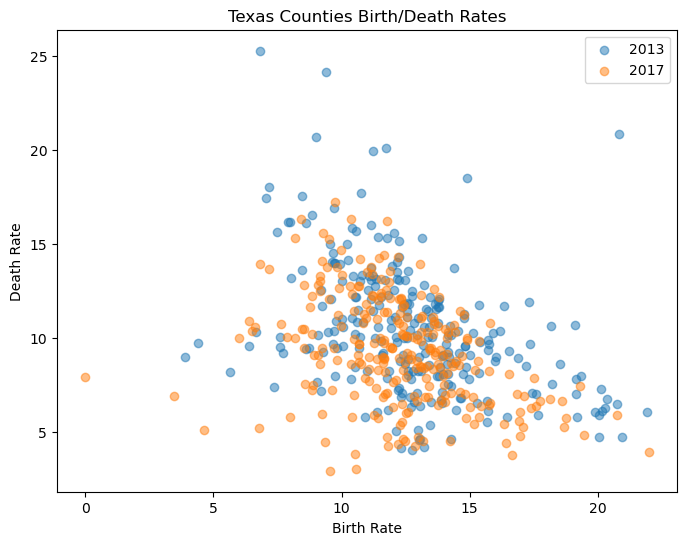

In [15]:
plt.figure(figsize=(8,6))
plt.scatter(dfTX.R_birth_2013,dfTX.R_death_2013,alpha=0.5,label="2013")
plt.scatter(dfTX.R_birth_2017,dfTX.R_death_2017,alpha=0.5,label="2017")
plt.legend()
plt.xlabel("Birth Rate")
plt.ylabel("Death Rate")
plt.title("Texas Counties Birth/Death Rates");

In [21]:
birthRates = list(filter(lambda x: x.startswith("R_birth"),dfTX.columns))
deathRates = list(filter(lambda x: x.startswith("R_death"),dfTX.columns))
years = np.array(list(map(lambda x: int(x[-4:]), birthRates)))

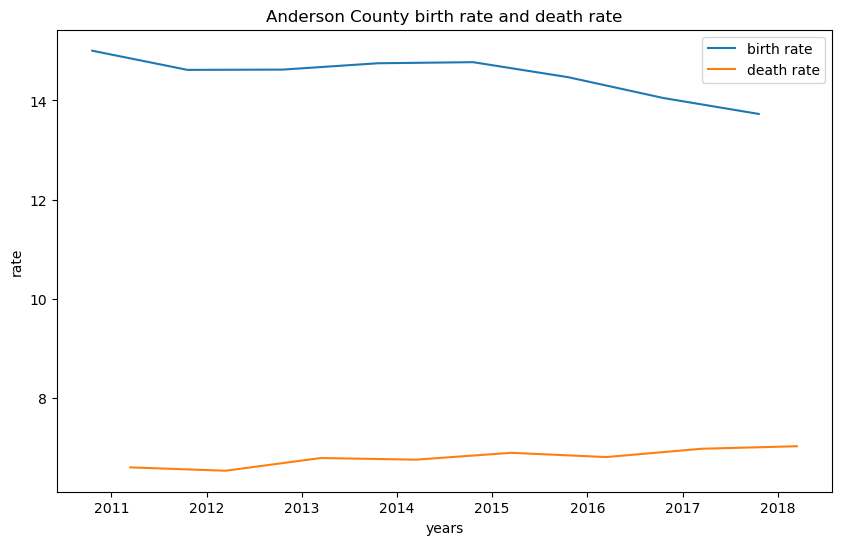

In [22]:
plt.figure(figsize=(10,6))
width=0.4
plt.plot(years-width/2, dfTX.iloc[0][birthRates], label= "birth rate")
plt.plot(years+width/2, dfTX.iloc[0][deathRates],label="death rate")
plt.xlabel("years")
plt.ylabel("rate")
plt.legend()
plt.title("Anderson County birth rate and death rate");

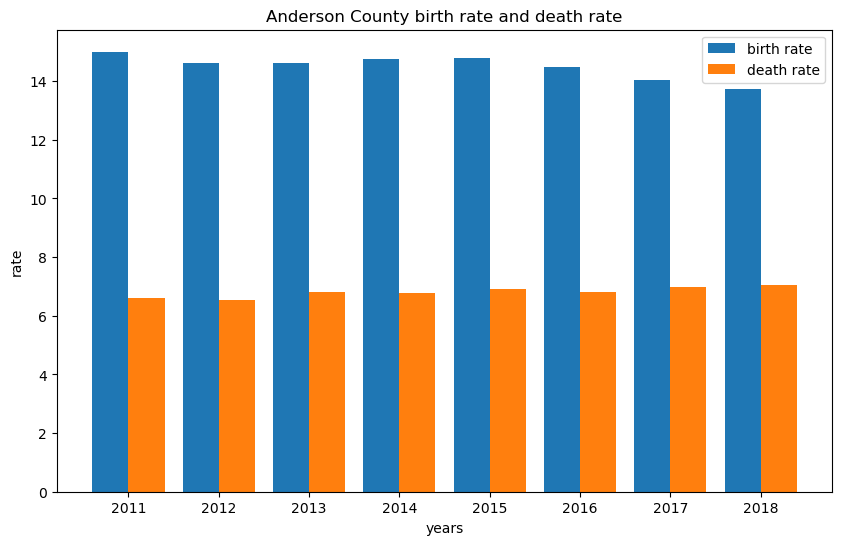

In [24]:
plt.figure(figsize=(10,6))
width=0.4
plt.bar(years-width/2, dfTX.iloc[0][birthRates],
        width=width, label= 'birth rate', alpha = 1)
plt.bar(years+width/2, dfTX.iloc[0][deathRates],
        width=width,label="death rate", alpha = 1)
plt.xlabel("years")
plt.ylabel("rate")
plt.legend()
plt.title("Anderson County birth rate and death rate");

NameError: name 'popChanges' is not defined

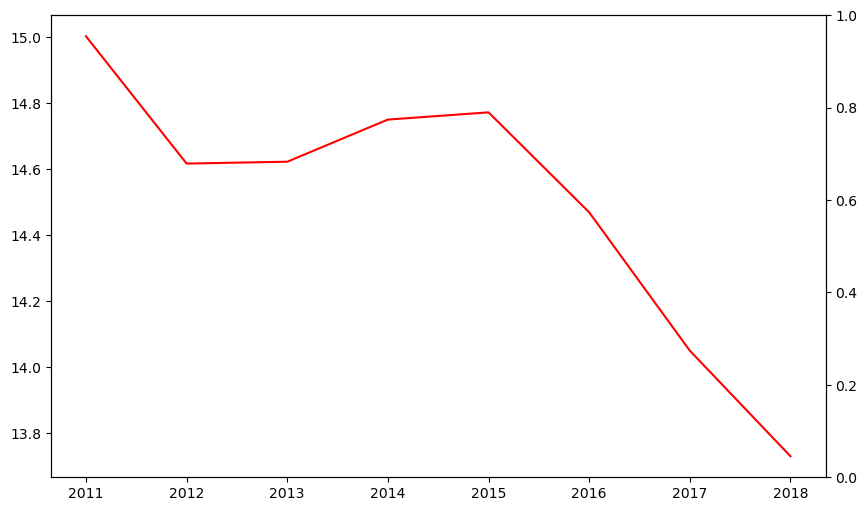

In [25]:
figure, ax1 = plt.subplots(figsize=(10,6))
ax1.plot(years, dfTX.iloc[0][birthRates], label= "birth rate",c="red")
ax2 = ax1.twinx()
ax2.plot(years, dfTX.iloc[0][popChanges][1:], label="population change")
ax1.set_xlabel("years")
ax1.set_ylabel("birth rate")
ax2.set_ylabel("population change")
ax1.legend()
ax2.legend()
plt.title("Anderson County birth rate and population change");

NameError: name 'popChanges' is not defined

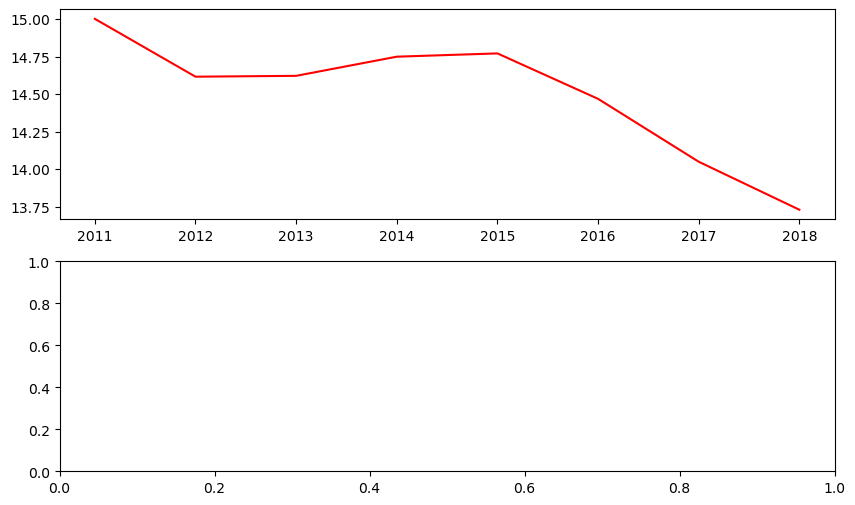

In [26]:
figure, axes = plt.subplots(2,1,figsize=(10,6))
axes[0].plot(years, dfTX.iloc[0][birthRates], label= "birth rate",c="red")
axes[1].plot(years, dfTX.iloc[0][popChanges][1:], label="population change")
axes[1].set_xlabel("years")
axes[0].set_ylabel("birth rate")
axes[1].set_ylabel("population change")
axes[0].legend()
axes[1].legend()
axes[0].set_title("Anderson County birth rate and population change");

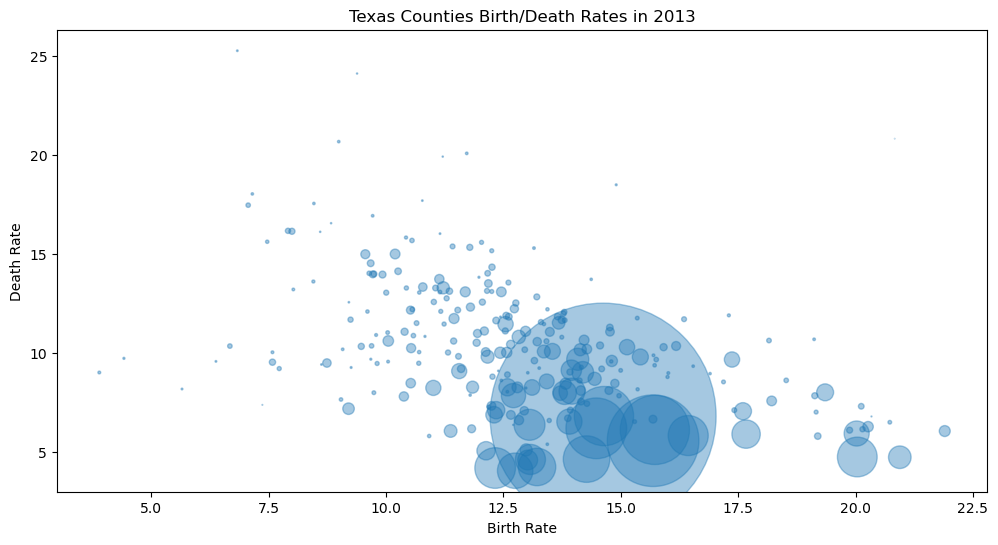

In [27]:
plt.figure(figsize=(12,6))
plt.scatter(dfTX.R_birth_2013,
            dfTX.R_death_2013,
            alpha=0.4,
            s = dfTX.POP_ESTIMATE_2013/1000,
            )
plt.xlabel("Birth Rate")
plt.ylabel("Death Rate")
plt.title("Texas Counties Birth/Death Rates in 2013");